# EDA hazifeladat - IMDB filmek

In [ ]:
# imports
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

# Adatok és téma bemutatása

Forrás:
[link]

In [ ]:
df = pd.read_csv("data.csv")

Az adatok IMDb nevű interneten elérhető filmadatbázisból lettek kinyerve CSV
formátumban kutatási és oktatási célokra. Az adathalmaz 10,000 rekordot tartalmaz
különböző 1915 és 2023 között megjelent filmekről. A filmek neve és megjelenésük éve
mellett olyan adatokat is tartalmaz, mint felhasználói és filmkritikusi értékelések,
bevétel, filmhossz, műfaj, besorolás, rendező, rövid leírás, illetve a filmben szereplő
színészek. 

In [ ]:
df.columns

Movie Name              object
Year of Release          int64
Run Time in minutes      int64
Movie Rating           float64
Votes                    int64
MetaScore              float64
Gross                  float64
Genre                   object
Certification           object
Director                object
Stars                   object
Description             object
dtype: object

10000 rendelkezésünkre álló adatrekord van, amik összesen 12 attribútummal rendelkez(het)nek

In [18]:
df.shape

(10000, 12)

## Adatok egységesítéseértelmezése, egységesítése

### Jellemzők értelmezése

Bekrül egy Unnamed: 0 oszlop, amit eltávolítunk az elején, hogy ez a későbbiekben ne zavarjon ba.

In [1]:
df = df.drop(columns=["Unnamed: 0"])

NameError: name 'df' is not defined

Oszlopok neveinek egységesítése kisbetűsre, szóközök eltávolítása, illetve azok alulvonásra való cseréje

In [ ]:
df = df.rename(columns={'Movie Name': 'movie_title',
                   'Year of Release': 'year_released',
                   'Run Time in minutes': 'run_time_in_minutes',
                   'Movie Rating': 'movie_rating',
                   'Votes': 'votes',
                   'MetaScore': 'metascore',
                   'Gross': 'gross',
                   'Genre' : 'genre',
                   'Certification': 'certification',
                   'Director': 'director',
                   'Stars' : 'actors',
                   'Description': 'description'})

In [ ]:
df.columns

movie_title             object
year_released            int64
run_time_in_minutes      int64
movie_rating           float64
votes                    int64
metascore              float64
gross                  float64
genre                   object
certification           object
director                object
actors                  object
description             object
dtype: object

A Metascore 0-100 közötti float értékekt tartalmaz, bár nem egész a típusa egész értékeket vesz fel (pl.: 87.0). A Movie Rating 1-10 közötti float értékeket vesz fel egy tizedes pontossággal (pl.: 6.7)
Úgy döntöttem, hogy az értékeket float-ra alakítom, mert ay képes Nan étékeket tárolni.

In [ ]:
df['metascore'] = df['metascore'] / 10
df.head()

,movie_title,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross,genre,certification,director,actors,description
0,The Shawshank Redemption,1994,142,9.3,2804443,8.2,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,The Godfather,1972,175,9.2,1954174,10.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,The Dark Knight,2008,152,9.0,2786129,8.4,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


### A rekordok értelmezése

A következőben megvizsgáltam, hogy oszloponként mekkora százalákban vannak hiányzó adatok. A certification-ben elhanyagolható a 3,7%, míg a metascore-ban a 20%, illetve a gross-ban a közel 30% már jelentősnek számít. Ezek az atribútumok odafigyelést igényelnek a későbbiekben.

In [ ]:
df.isnull().sum() / df.shape[0] * 100

movie_title             0.00
year_released           0.00
run_time_in_minutes     0.00
movie_rating            0.00
votes                   0.00
metascore              20.26
gross                  29.15
genre                   0.00
certification           3.69
director                0.00
actors                  0.00
description             0.00
dtype: float64

Duplikált sorok

In [ ]:
df.duplicated().sum()

np.int64(0)

## Kezdeti adatvizualizációk
Eloszlások, alapvető grafikonok, áttekintő ábrák

In [24]:
movies_per_year =  df.groupby(['year_released'])

Filmek megjelenéseinek darabszáma az évek során

<Axes: title={'center': 'Number of movies released per year'}, xlabel='Year', ylabel='Number of movies'>

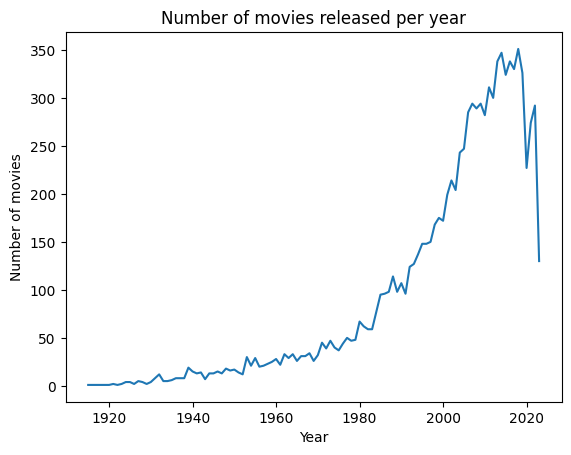

In [25]:
movies_per_year.size().plot(title="Number of movies released per year", xlabel="Year", ylabel="Number of movies")

2020 elott a filmek visszaesese

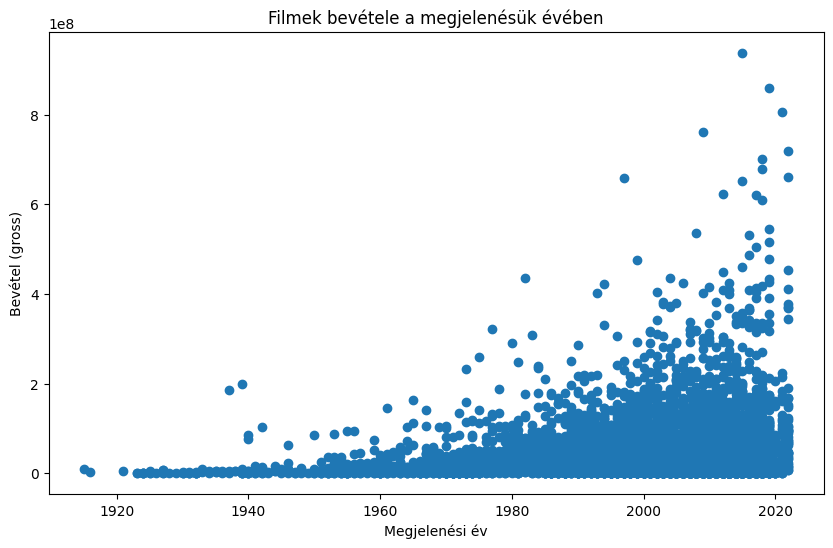

In [26]:


plt.figure(figsize=(10, 6))

plt.scatter(df["year_released"], df["gross"])
plt.xlabel("Megjelenési év")
plt.ylabel("Bevétel (gross)")
plt.title("Filmek bevétele a megjelenésük évében")

plt.show()


In [27]:
Hogyan dragultak a filmek
Mennyibe kerul egy percnyi film
Aranyositva dollar arfolyammal

SyntaxError: invalid syntax (3579033226.py, line 1)

<Axes: >

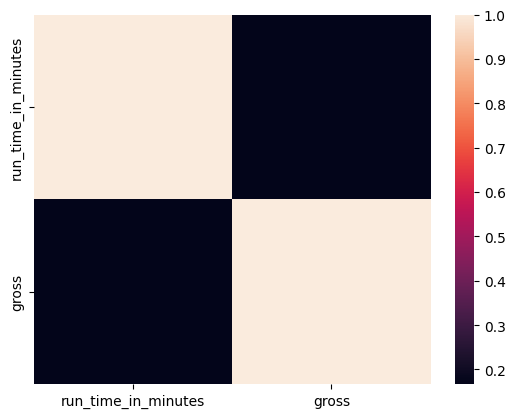

In [ ]:
gross_runtime_corr = df[[ 'run_time_in_minutes', 'gross']].dropna().corr()
sns.heatmap(gross_runtime_corr)

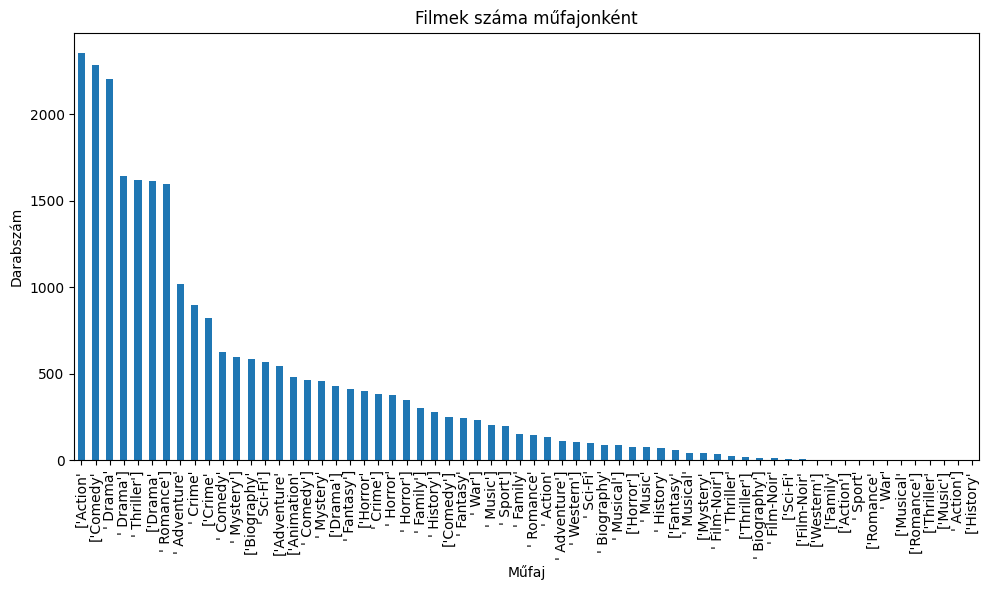

In [ ]:
genre_counts = df["genre"].str.split(", ").explode().value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind="bar")
plt.xlabel("Műfaj")
plt.ylabel("Darabszám")
plt.title("Filmek száma műfajonként")
plt.tight_layout()
plt.show()

tablazat mufajonkent az osszesitett / atlag bevetel, nepszeruseg, ertekeles
hasonloan ugyanez rendezokkel es besorolassal

## Összefüggések feltárása
Korrelációk, releváns kapcsolatok, érdekes megfigyelések kiemelése

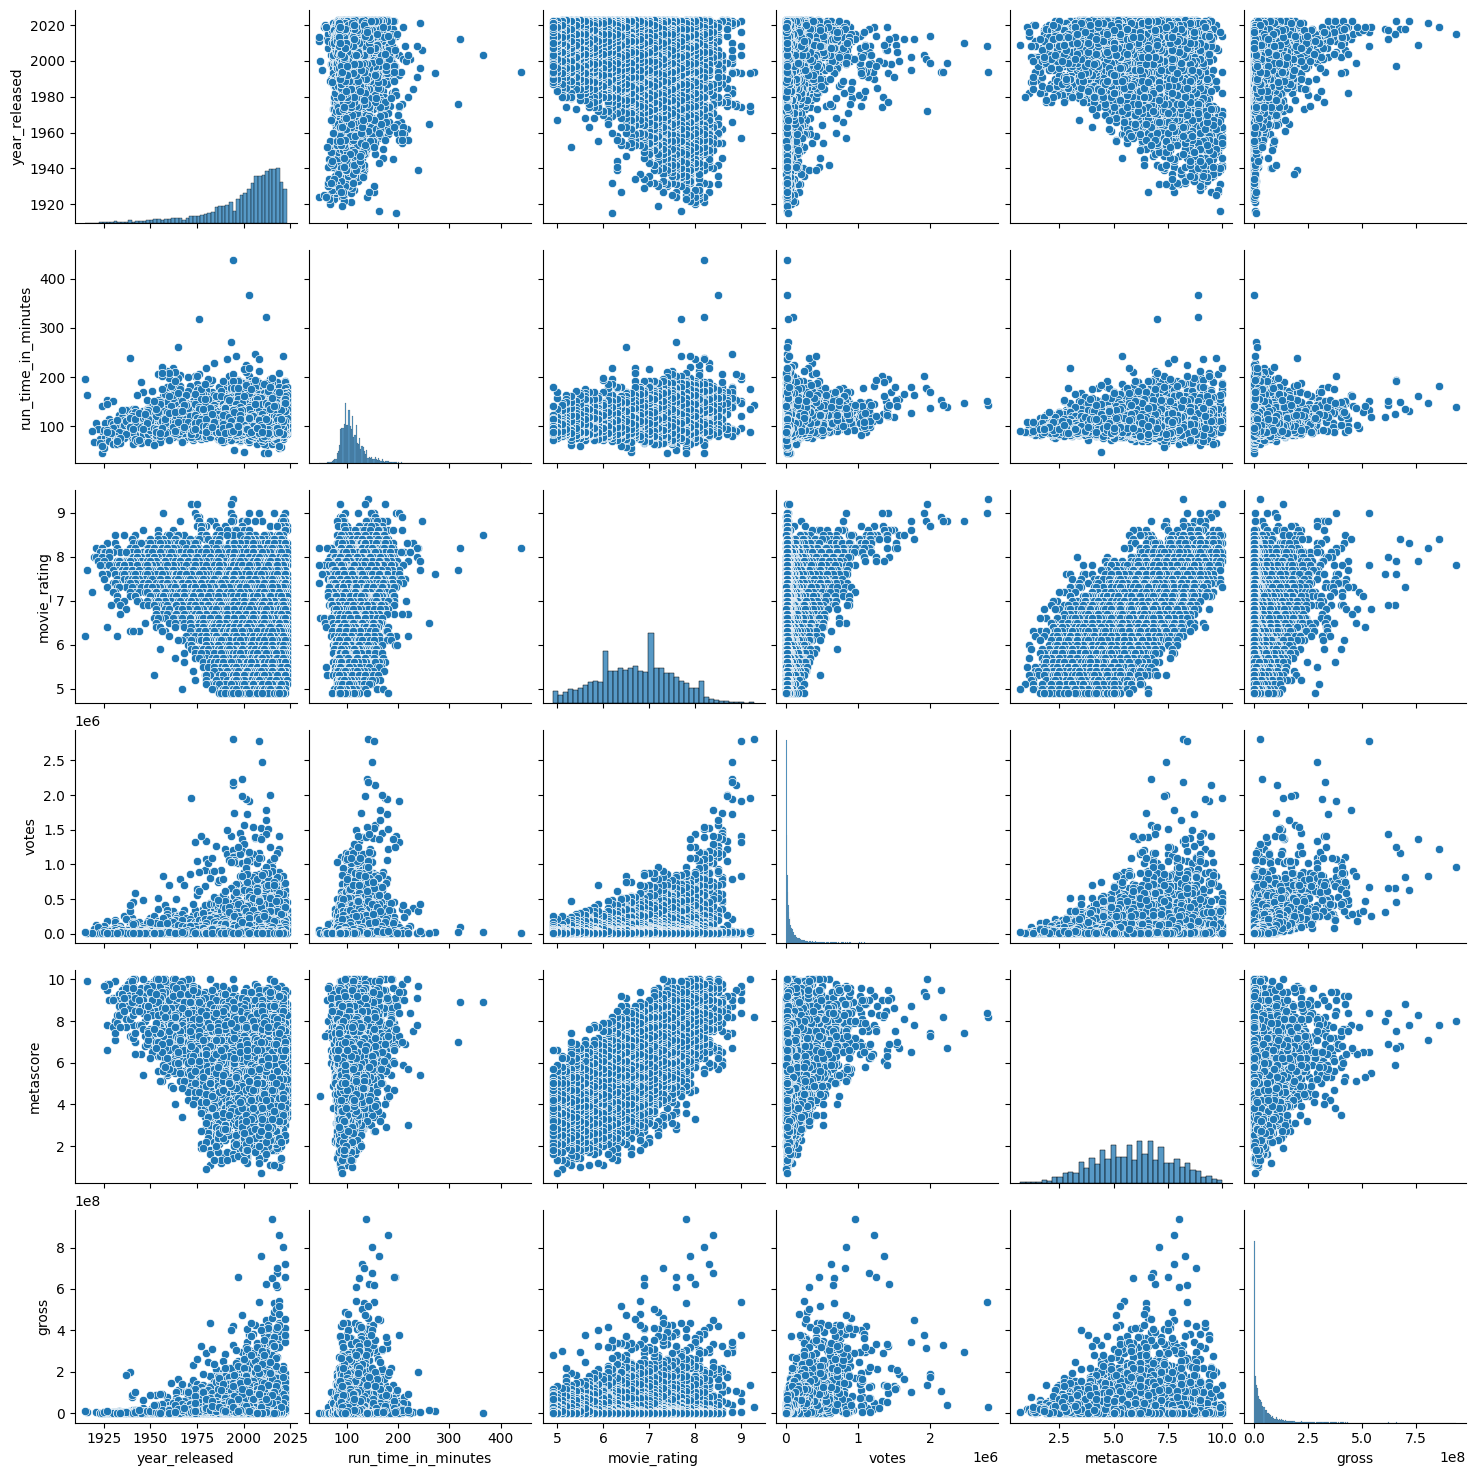

In [ ]:
pp = sns.pairplot(df, vars=['year_released', 
                       'run_time_in_minutes', 
                       'movie_rating',
                       'votes', 
                       'metascore', 
                       'gross'])

In [ ]:
corr = df[['year_released', 
           'run_time_in_minutes', 
           'movie_rating',
           'votes', 
           'metascore', 
           'gross']].dropna().corr()
corr

,year_released,run_time_in_minutes,movie_rating,votes,metascore,gross
year_released,1.000000,-0.048637,-0.238450,0.076997,-0.210552,0.106044
run_time_in_minutes,-0.048637,1.000000,0.371333,0.293868,0.230960,0.212263
movie_rating,-0.238450,0.371333,1.000000,0.422633,0.722600,0.122494
votes,0.076997,0.293868,0.422633,1.000000,0.228905,0.607358
metascore,-0.210552,0.230960,0.722600,0.228905,1.000000,0.044752
gross,0.106044,0.212263,0.122494,0.607358,0.044752,1.000000


<Axes: >

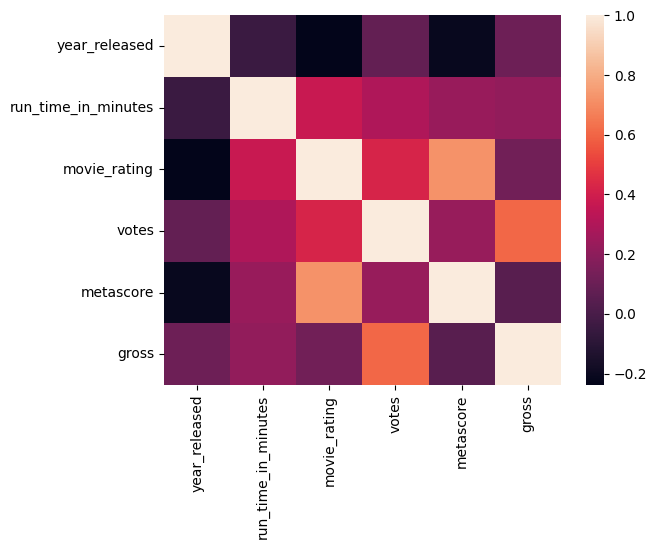

In [ ]:
sns.heatmap(corr)

## Kezdeti hipotézisek megfogalmazása